In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv("data/drug200.csv")

In [3]:
df


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


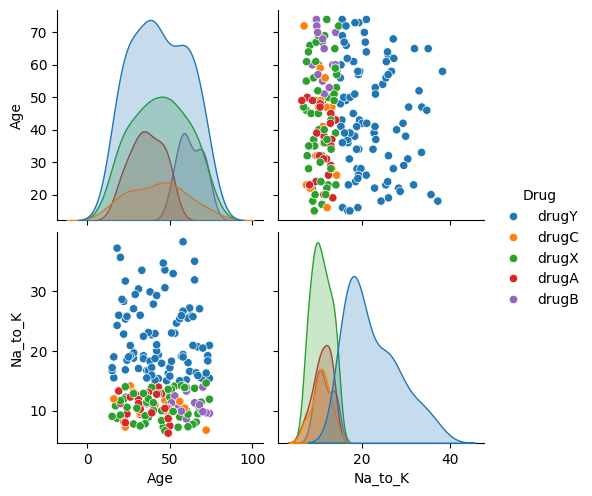

In [4]:
sns.pairplot(data=df, hue='Drug')

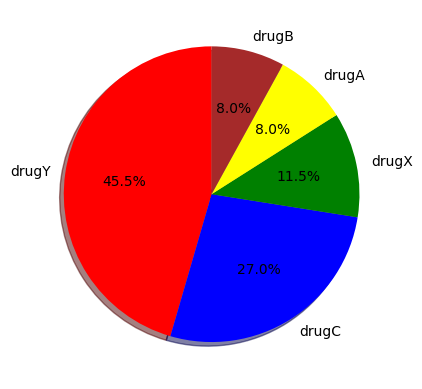

In [28]:
labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
values = df['Drug'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['red', 'blue','green','yellow','brown']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

In [5]:
df.describe(include='O')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


In [6]:
lable_enc = LabelEncoder()

columns = df.select_dtypes(include='O').columns

for column in columns:
    df[column] = lable_enc.fit_transform(df[column])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [7]:
X = df.drop(columns='Drug')
Y = df['Drug']

In [8]:
display(X.head(3), Y.head(3))

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114


0    4
1    2
2    2
Name: Drug, dtype: int64

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

In [10]:
# Building the model 
tree_clf0 = DTC()
# Fitting the model
tree_clf0.fit(X_train,Y_train)

DecisionTreeClassifier()

In [11]:
tree_clf0.score(X_train, Y_train)

1.0

In [12]:
tree_clf0.score(X_test, Y_test)

1.0

In [13]:
Y_pred = tree_clf0.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

1.0

In [26]:
confusion_matrix(Y_test, Y_pred, labels=column_labels)

array([[2, 0, 0, 0, 0],
       [0, 6, 0, 0, 0],
       [0, 0, 7, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 3]])

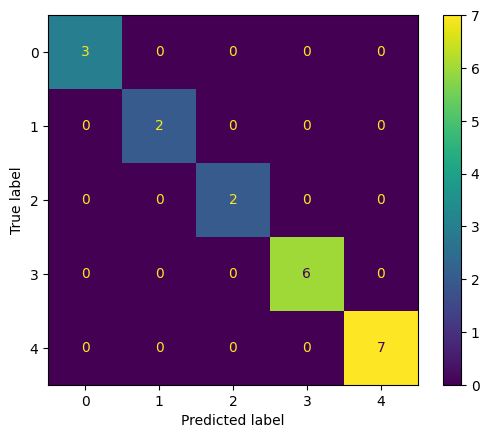

In [27]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)

In [14]:
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



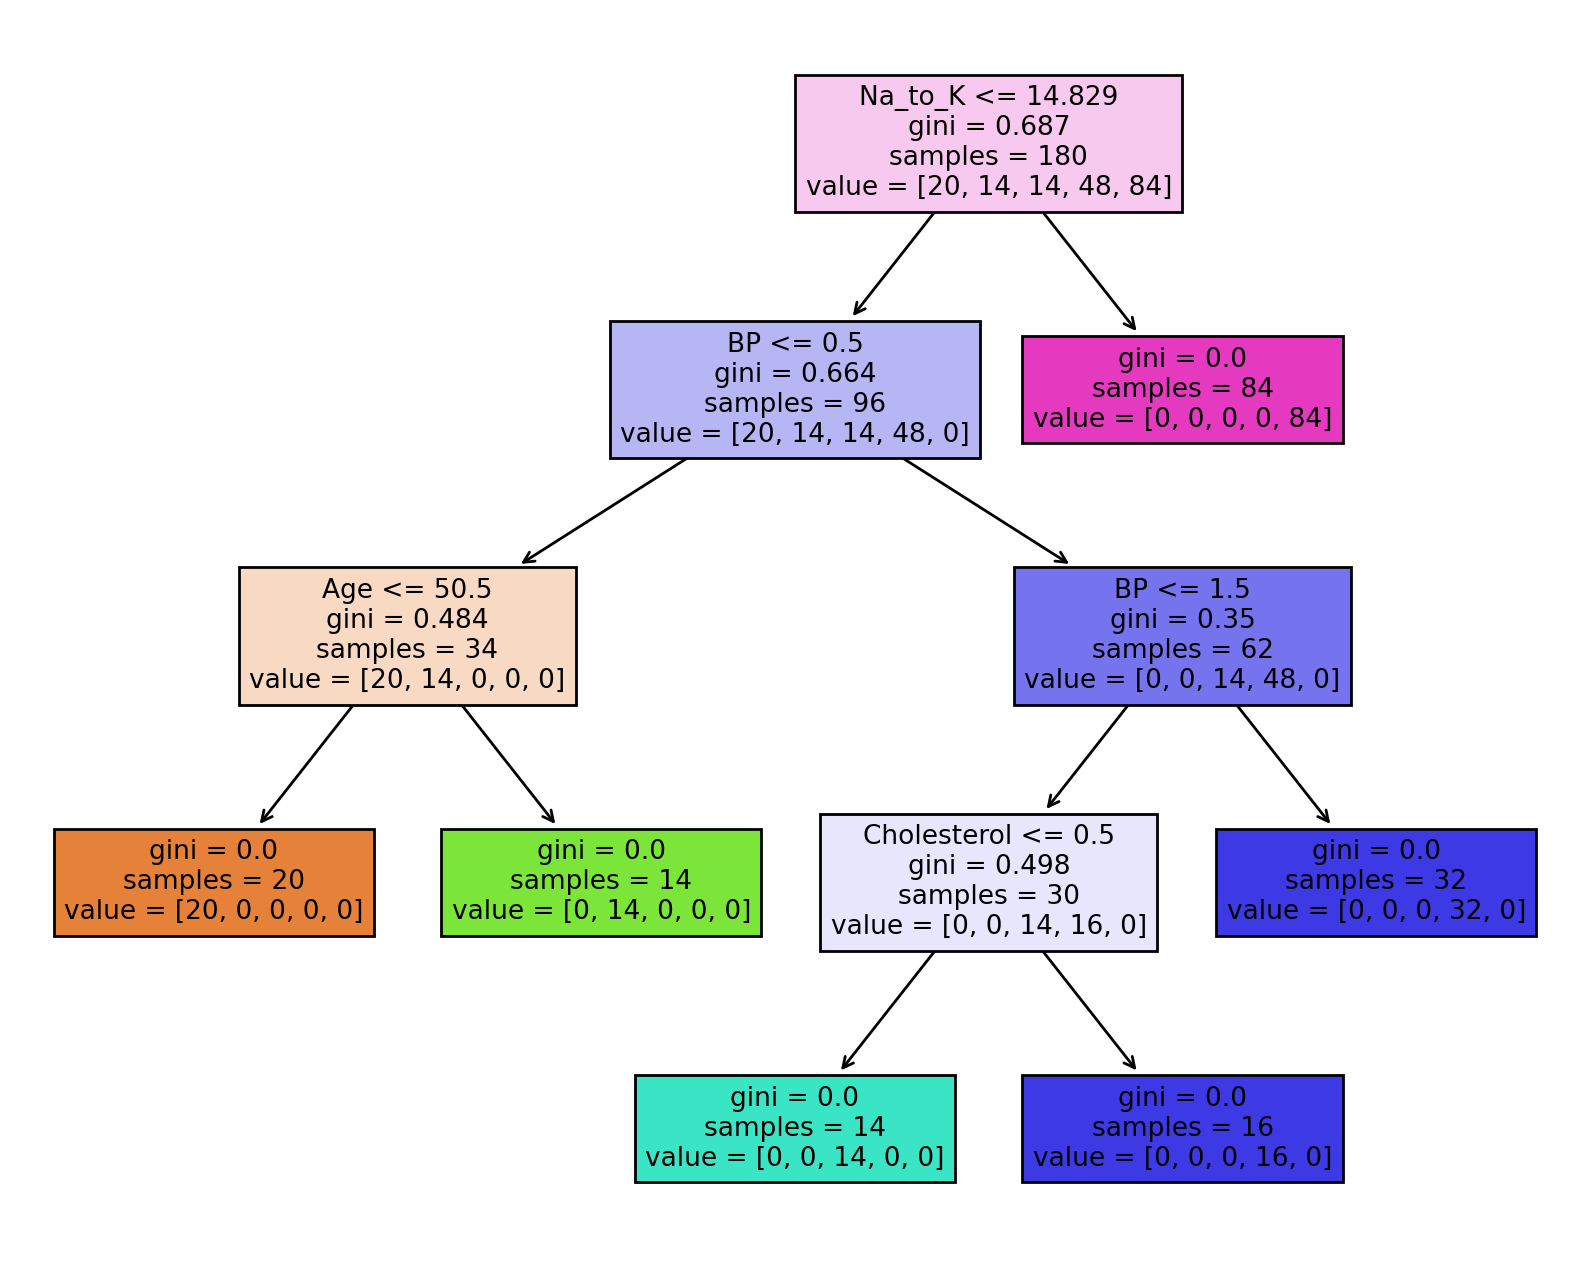

In [15]:
plt.figure(figsize=(10, 8), dpi=200)
plot_tree(tree_clf0, feature_names=df.columns, filled=True);

In [16]:
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         3\n           1       1.00      1.00      1.00         2\n           2       1.00      1.00      1.00         2\n           3       1.00      1.00      1.00         6\n           4       1.00      1.00      1.00         7\n\n    accuracy                           1.00        20\n   macro avg       1.00      1.00      1.00        20\nweighted avg       1.00      1.00      1.00        20\n'